<a href="https://colab.research.google.com/github/remabreu/DiamondsPrices/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Análise de Dados e Boas Práticas
**Name**: Rodrigo Eduardo Abreu

**Dataset**: [Diamond Prices][def]

[def]: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

### Problem Description

Diamond prices is a multi-featured dataset that contains Diamonds characteristics and measurements to define their prices. The main target of the dataset is to provide adequate information to predict the diamond prices given the attributes that best correlates with the price change.
As part of the exercise, in summary, it will be initially performed an exploratory data analysis to indetify pattenrs, special data behavior, correlations, possible outliers as also, but not limited to, find empty or zero variables to next execute the pre-proecessing of the dataset which includes data wrangling and needed transformations to prepare the data to be applied ML models.

The Diamond Prices is a typical problem for predictive analysis fitting into **supervised regression learning** in which input variables are used to predict a **target variable**, the price of the diamond. These prices are prvided by the "supervisor" entity, in this case the diamonds maket.

**Regression** is a statistical analysis technique that estimates relationships between variables. Regression is useful to determine patterns in large datasets to determine the correlation between inputs.


### Data Selection and Features

The Diamond dataset is a common and well known regression problem in [Kaggle](https://www.kaggle.com). The Dataset is in the latest updated version and contains `53943` records and `11` Features (one of the attributes is the index and has no relationship with the data analysis).

The Data Dictionary and its attributes are described in detail in the [README](https://github.com/remabreu/DiamondsPrices/blob/main/README.md) file.

### Hypotesis and relevant questions

- Carat has high correlation with diamond prices.
- Bigger the carat, the higher the price?
- Is the diamond price dependent on categorical variables (cut, color, clarity)?


### Libraries used

Library imports required for data analysis, visualization and preprocessing.
It also loads the Diamonds dataset from Kaggle repositories

In [53]:
# Configuration to omit warnings
import warnings
warnings.filterwarnings("ignore")

# Kaggle Library to download the lastest and most updated dataset.
import kagglehub

# main Python library for EDA
import pandas as pd
import numpy as np

#for missing handling
import missingno as ms

#Imports for graphical charts
import matplotlib.pyplot as plt
import seaborn as sns

#Train and Test split functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/diamonds-prices")

print("Path to dataset file:", path)

Path to dataset file: /kaggle/input/diamonds-prices


In [55]:
#Store the dataset into a Dataframe object
diamonds_df = pd.read_csv(path+"/Diamonds Prices2022.csv")

type(diamonds_df)

pandas.core.frame.DataFrame

In [56]:
#initial rows to have a grasp of the data
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# last rows
diamonds_df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


### Exploratory Data Analysis

This sections aims to identify, the amount of lines, columns, their corresponding type and other relevant info.
- Lines: `53943`
- Columns: `11` - Column `Unnamed: 0` corresponds only to indexing, irrelavant to the analysis - can be removed
- Null values: `none`
- Types: `float64(6), int64(2), categorical(3)`

In [6]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


##### Considerations of Descriptive Statictics

- x, y, z have some of their values equal to 0, but the amount is insignificant (only 20 records in total) compared to the whole set of data. So, action no is required (during the preprocessing phase).

- Price column seems to have a long tail to the right (max value is around $18K). The mean, standard deviation and mainly, the coefficient of variance equal to `1` suggest prices stretch over a very wide range as well as expecting a high relative variability. Therefore, the mean is not a good representation value in the data.

- Carat also suggests high variability, but no tail is observed from the coefficient of variance once it is between 0.3 and 1.0.

- Depth and Table suggest very low variability and tightly clustered - values outside this range may suggest outliers to be evaluated during preprocessing phase.

- Carat and Price columns may also suggest a significant amount of outliers due to the high variability. More variability usually leads to more _statistical outliers_, and in the diamonds dataset that is exactly what is observed for price and, to a lesser extent, carat. The interquartile range (IQR) method calculates the outliers (other possible method to be applied is the z-scores). There are around 6.6% and 3.5% outliers on the Price and Carat tables.

- It is important to understand these values are either real observations and therefore must remain part of the further analysis or simply a flaw in the measurement and these outliers must be removed from the dataset.

Later, these assumptions will be graphically confirmed and demonstrated.


In [7]:
# verify the amount of diamond meausrements have zero value (x, y, z)
print("", ((diamonds_df['x'] == 0) | (diamonds_df['y'] == 0) | (diamonds_df['z'] == 0)).sum())

 20


In [8]:
#make sure there is no duplicated row
df = diamonds_df[diamonds_df.duplicated()]
df.empty

True

<Axes: >

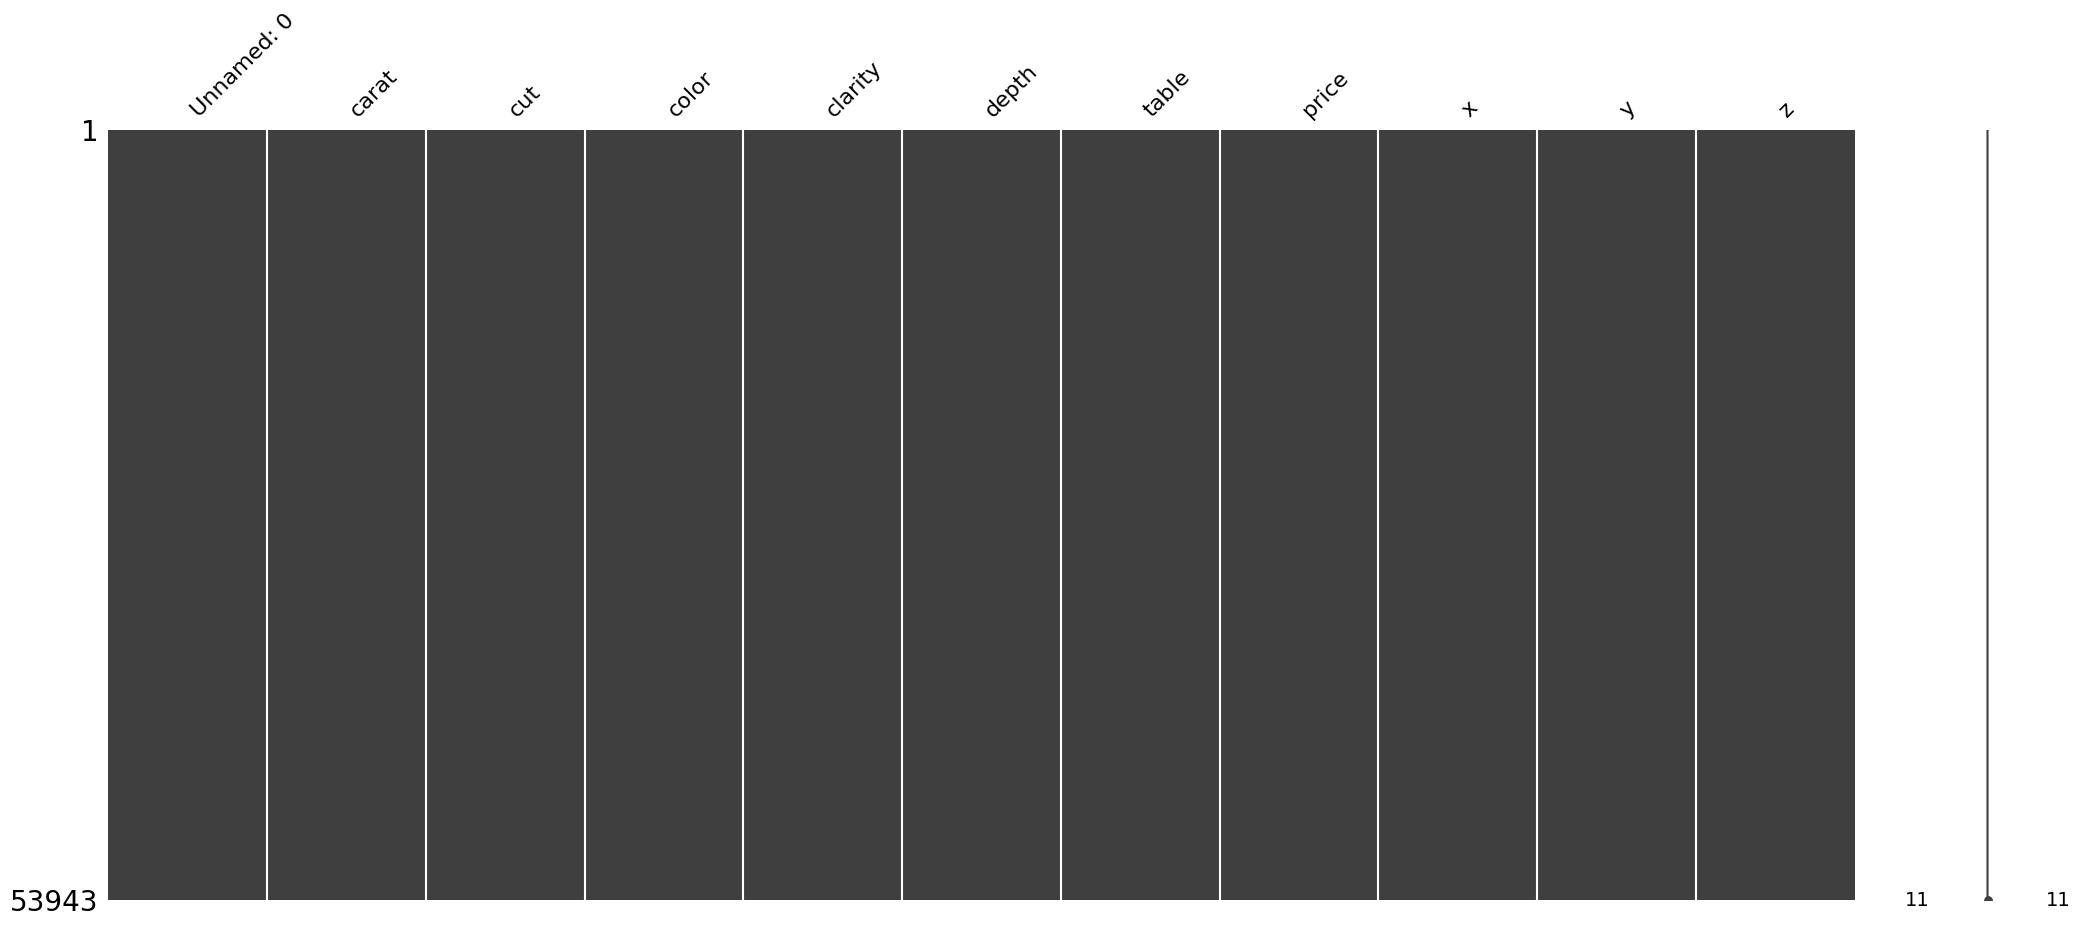

In [9]:
# Missingno is an excellent and simple to use Python library that provides a
#series of visualisations to understand the presence and distribution of missing data within a dataframe.
#This is done in a form of matrix plot. The result indicates there is no missings
ms.matrix(diamonds_df)

In [57]:
# drop first column, ignore error in case culumn doesn't exist (already removed)
diamonds_df = diamonds_df.drop('Unnamed: 0', axis=1, errors='ignore')
# looking at descriptive statistics, including also categorical variables for convenience
diamonds_df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53943.000000,53943,53943,53943,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13067,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797935,NaN,NaN,NaN,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,NaN,NaN,NaN,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000


In [11]:
# the mode is the value that appears most frequently in a dataset
diamonds_df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


In [12]:
#The median is the middle value in which divides the dataset in half
# (50% less than to the central point and 50% being greater of it).

numeric_df = diamonds_df.select_dtypes(include=['number'])
numeric_df.median()

,0
carat,0.70
depth,61.80
table,57.00
price,2401.00
x,5.70
y,5.71
z,3.53


In [13]:
# The Coeficient of Variance indicates the relative variability, expressed as the ratio of the standard deviation to the mean.
# Generally, the the CV is categorized into ranges to indicate the degree of data variability.
# Low Variability: < 0.1
# Medium Variability: between 0.1 and 0.2
# High Variability: between 0.3 and 1.0
# Very high variability or strong skew: > 1.0
def coeficient_variation(std_dev, avg, var):
    cv = std_dev/avg
    print(var, "- Coeficient of Variance:", "{:.2f}".format(cv))

coeficient_variation(diamonds_df['price'].std(), diamonds_df['price'].mean(), 'price')
coeficient_variation(diamonds_df['carat'].std(), diamonds_df['carat'].mean(), 'carat')
coeficient_variation(diamonds_df['depth'].std(), diamonds_df['depth'].mean(), 'depth')
coeficient_variation(diamonds_df['table'].std(), diamonds_df['table'].mean(), 'table')

price - Coeficient of Variance: 1.01
carat - Coeficient of Variance: 0.59
depth - Coeficient of Variance: 0.02
table - Coeficient of Variance: 0.04


In [14]:
# calculate how many outliers are present on the vairables price and carat.
# Initially, it is required to calculte the interquartile range (IQR) by finding
# the first and third quartiles (Q1 and Q3), calculating the IQR (Q3-Q1)
# Determine outlier boundaries:
# Lower bound: Q1 - 1.5 * IQR
# Upper bound: Q3 + 1.5 * IQR
for col in ['price', 'carat', 'table', 'depth']:
    Q1, Q3 = diamonds_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    n_out = (diamonds_df[col] > upper).sum()
    print(f"{col}: {n_out} out of {len(diamonds_df)} rows \
    (~{n_out/len(diamonds_df):.1%}) - values from {upper} to {diamonds_df[col].max()}")

price: 3540 out of 53943 rows     (~6.6%) - values from 11885.0 to 18823
carat: 1889 out of 53943 rows     (~3.5%) - values from 2.0 to 5.01
table: 589 out of 53943 rows     (~1.1%) - values from 63.5 to 95.0
depth: 1039 out of 53943 rows     (~1.9%) - values from 64.75 to 79.0


#### Categorical variables analysis and their relationship with price and carat

There are 3 categorical variables, ```cut```, ```color``` and ```clarity``` that along with ```carat``` (the 4Cs), best define a diamond price.
Let's initially analyze the distribution of diamonds classification among all these categories throughout the bar charts below.

From the bar charts and heatmap, easily distinguish that diamonds are grouped on:
- cut is more oriented to quality,
- color is centered on G–H (G–H stones dominate because they look near colorless, but don't suffer expansion of price)
- clarity peaks in the middle.

Therefore, the Ideal cut, G color and VS2 clarity dominate diamonds in the portfolio. This might lead to a higher consumer demand with stones following such characteristics.

One important observation is about the boxplot’s comparisons between price vs categorical features as well as carat vs categorical features. As the quality of the diamonds reduces, the mean price of the diamonds increases. That is very unusual and unexpected because normally higher prices are associated to higher quality. But why does this behavior is observed?

By observing the boxplots related to carat vs cut, color and clarity. For increasing quality, the mean of the carat reduces. That is, the higher the quality of the diamond, the lighter and smaller it will be.

That is the reason the best quality diamonds are less pricy, meaning they are smaller than the lower grade diamonds. Thus, it is feasible to infer from this that carat size is more an influence on the price of a diamond than its quality.

As an example, another important observation, despite the inventory concentrating more on "Ideal" diamonds, the boxplots indicate the "Premium" ones have higher prices. Taking a closer look, Ideal diamonds are considerably smaller/lighter than Premium ones, reinforcing the inference that carat has stronger influence over the price.


In [15]:
#display all values of category features
categories = diamonds_df.select_dtypes(include='object').columns

[print("Column", c, "category values", diamonds_df[c].unique()) for c in categories]


Column cut category values ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Column color category values ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Column clarity category values ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


[None, None, None]

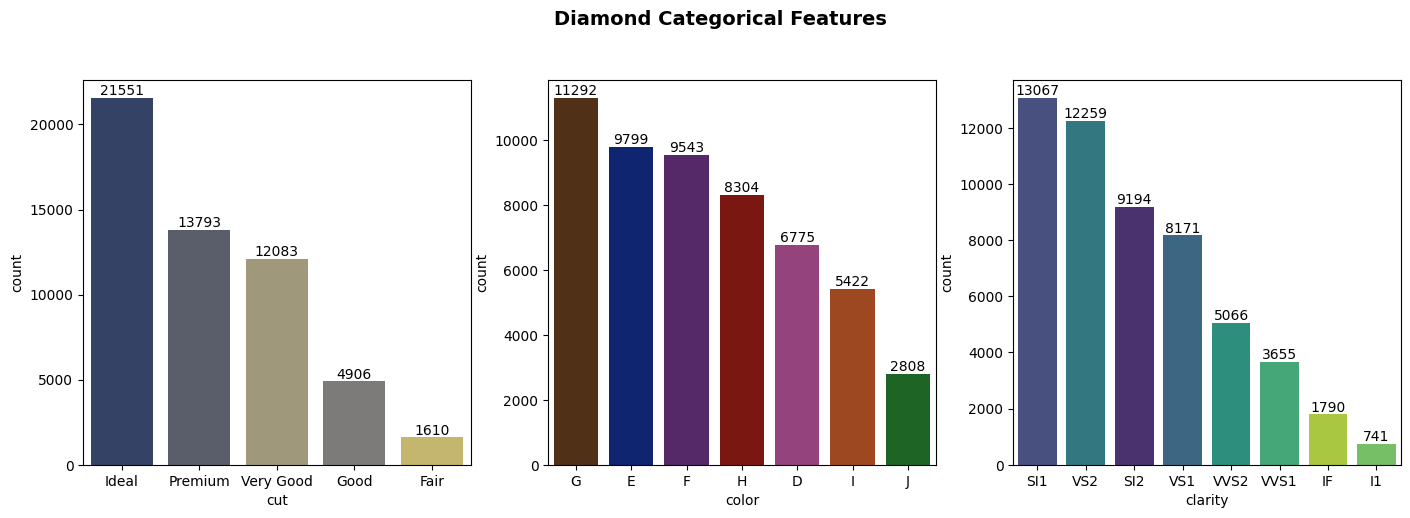

In [16]:

#define a function that plots all three categorical values in the dataset.
#values are ordered by count of occrucences in each category
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

def categorical_charts(categ_column, bar_colors, ax_position):
    group = diamonds_df.groupby(categ_column)[categ_column].count()
    sns.countplot(x=categ_column, data=diamonds_df, hue=categ_column,
                  order=group.sort_values(ascending=False).index,
                  palette=bar_colors, ax=ax[ax_position],
                  legend=False)
    [ax[ax_position].bar_label(ax[ax_position].containers[i],
                               label_type='edge') for i in range(len(ax[ax_position].containers))]

categorical_charts('cut', 'cividis', 0)
categorical_charts('color', 'dark', 1)
categorical_charts('clarity', 'viridis', 2)

fig.suptitle('Diamond Categorical Features',
             y=1.02,
             fontsize=14,
             fontweight='bold')

plt.show()

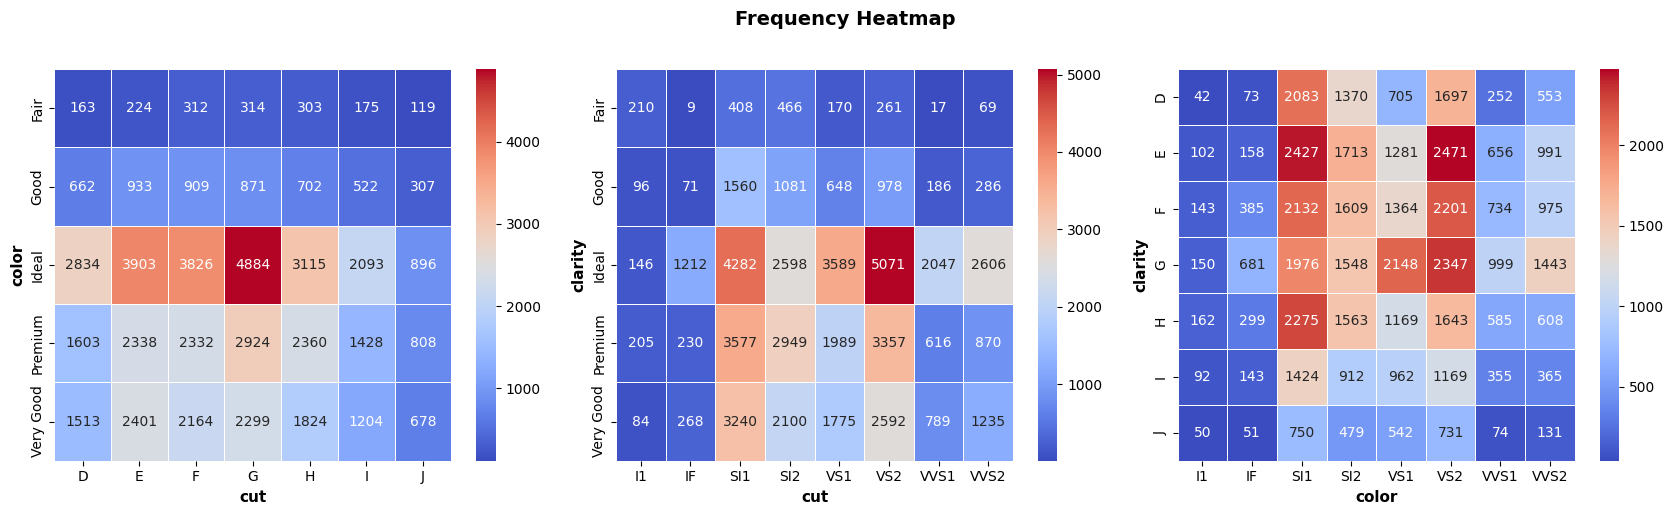

In [18]:
#define a iteration that plots the heatmap combining all three categorical variables.

fig, ax = plt.subplots(1, 3, figsize=(17, 5))
for idx, (categ_a, categ_b) in enumerate([('cut', 'color'),
                                          ('cut', 'clarity'),
                                          ('color', 'clarity')]):
  contingency_table = pd.crosstab(diamonds_df[categ_a], diamonds_df[categ_b])
  sns.heatmap(contingency_table,
              annot=True, fmt='d',
              cmap='coolwarm',
              linewidths=.5,
              ax=ax[idx])

  ax[idx].set_xlabel(categ_a, fontsize=11, fontweight='bold')
  ax[idx].set_ylabel(categ_b, fontsize=11, fontweight='bold')

fig.suptitle('Frequency Heatmap',
             y=1.02,
             fontsize=14,
             fontweight='bold')

plt.tight_layout()
plt.show()


Price Analysis:


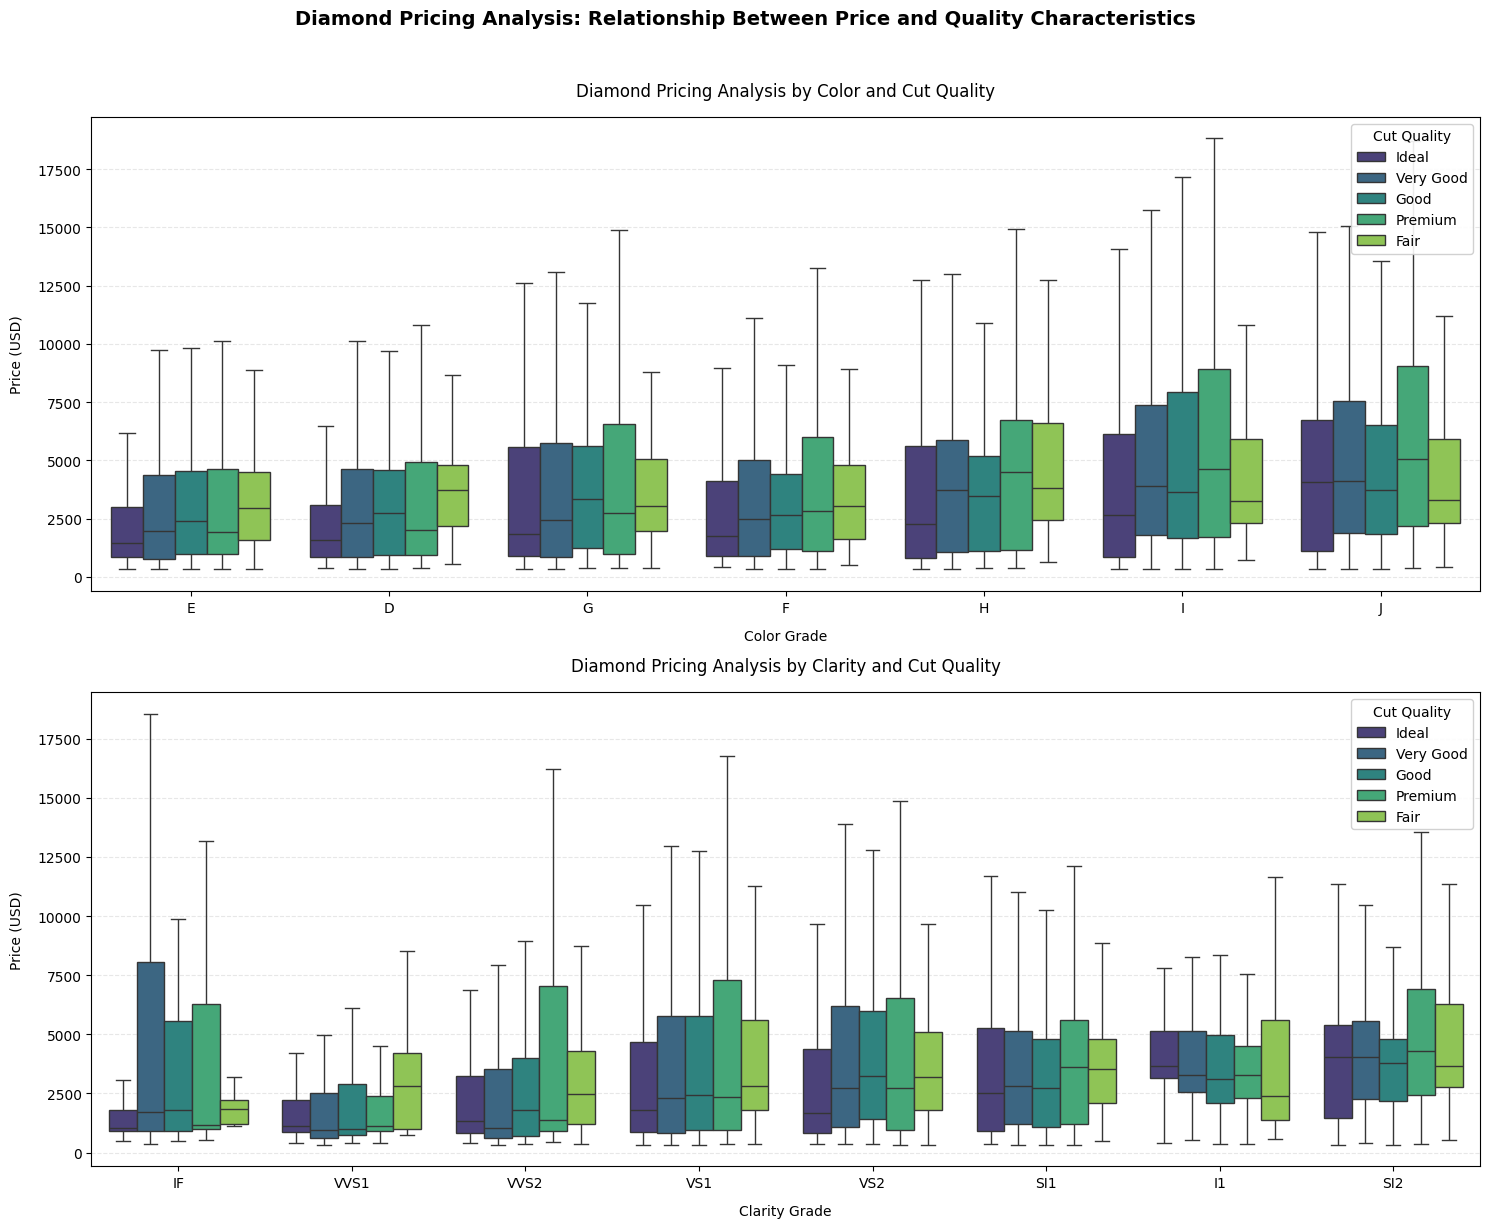


Carat Analysis:


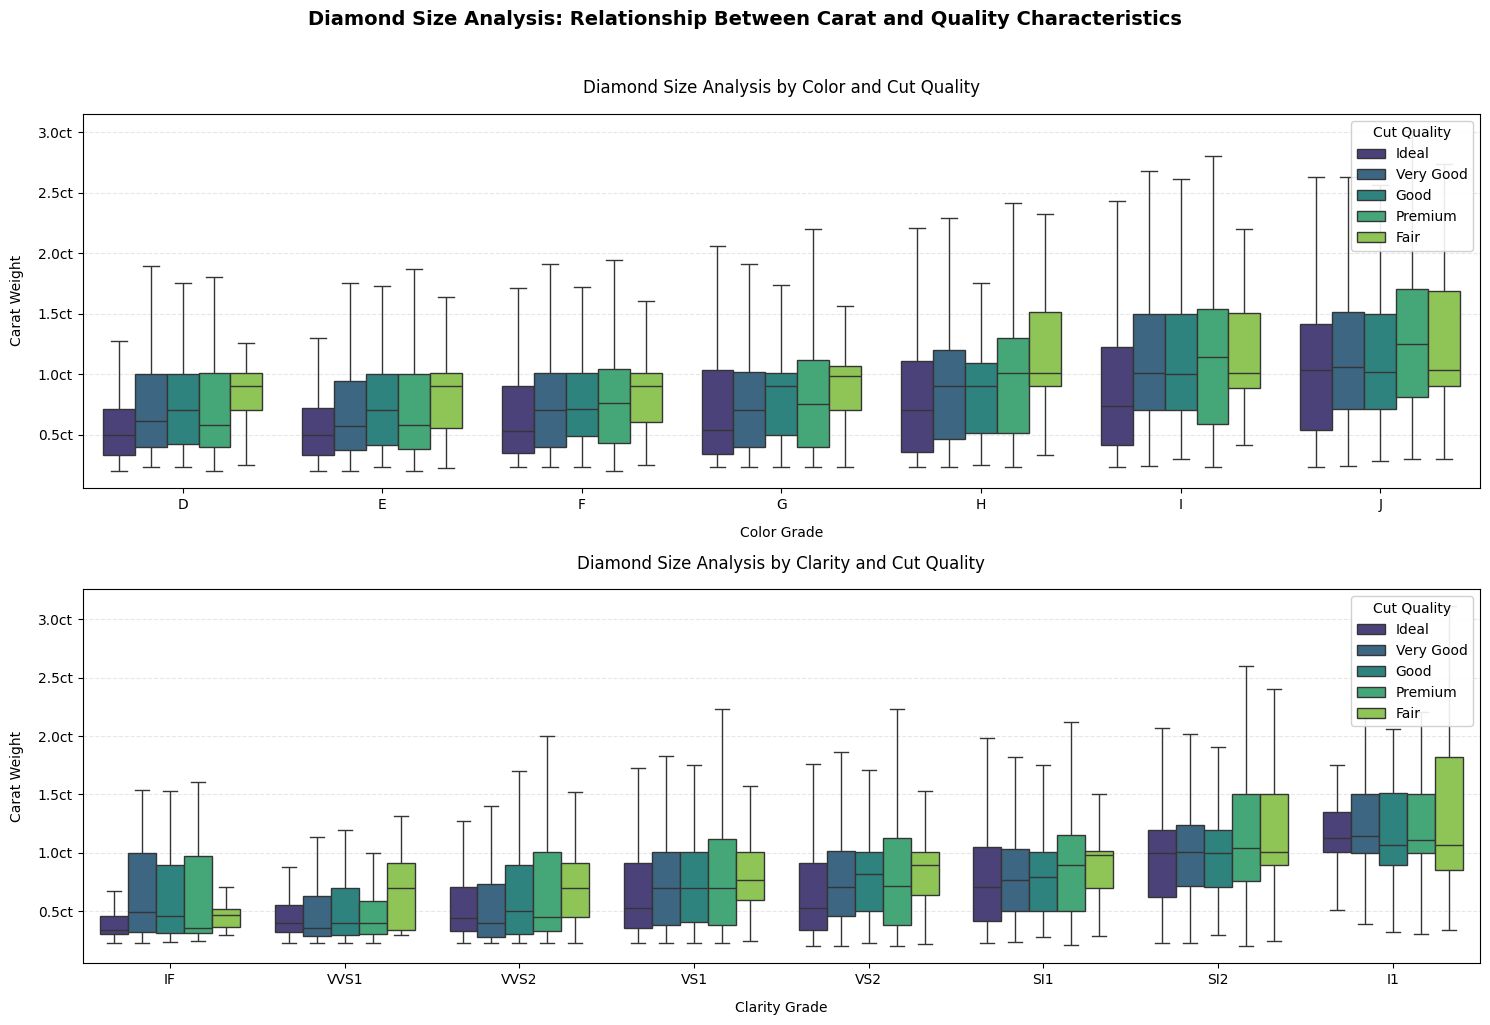

In [19]:

def create_median_orders(df, value_col):
    """Calculate median orders for consistent sorting across categories."""
    return {
        'cut': df.groupby('cut')[value_col].median().sort_values().index,
        'color': df.groupby('color')[value_col].median().sort_values().index,
        'clarity': df.groupby('clarity')[value_col].median().sort_values().index
    }

def plot_diamond_analysis(df, value_col, palette='viridis', figsize=(15, 12)):
    """
    Create a combined visualization of diamond characteristics.

    Parameters:
    - df: DataFrame containing diamond data
    - value_col: Column to analyze ('price' or 'carat')
    - palette: Color palette to use
    - figsize: Figure dimensions
    """
    # Set up plot configurations based on value column
    config = {
        'price': {
            'title': "Diamond Pricing Analysis",
            'ylabel': "Price (USD)",
            'unit': "",
            'ticks': None,
            'palette': 'viridis'
        },
        'carat': {
            'title': "Diamond Size Analysis",
            'ylabel': "Carat Weight",
            'unit': "ct",
            'ticks': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
            'palette': 'rocket'
        }
    }[value_col]

    if palette is None:
        palette = config['palette']

    median_orders = create_median_orders(df, value_col)

    # Create figure with adjusted layout
    fig, axes = plt.subplots(2, 1, figsize=figsize)
    plt.subplots_adjust(hspace=0.3)

    # Plot configurations for each subplot
    plot_configs = [
        {'x': 'color', 'title': f"by Color and Cut Quality"},
        {'x': 'clarity', 'title': f"by Clarity and Cut Quality"}
    ]

    for ax, plot_cfg in zip(axes, plot_configs):
        sns.boxplot(
            data=df,
            x=plot_cfg['x'],
            y=value_col,
            hue='cut',
            hue_order=median_orders['cut'],
            order=median_orders[plot_cfg['x']],
            ax=ax,
            showfliers=False,
            palette=palette
        )

        ax.set_title(f"{config['title']} {plot_cfg['title']}", pad=15)
        ax.set_xlabel(f"{plot_cfg['x'].title()} Grade", labelpad=10)
        ax.set_ylabel(config['ylabel'], labelpad=10)
        ax.legend(
            title='Cut Quality',
            loc='upper right',
            frameon=True,
            framealpha=0.9
        )

        # Customize y-axis if specific ticks are provided
        if config['ticks']:
            ax.set_yticks(config['ticks'])
            if config['unit']:
                ax.set_yticklabels([f"{tick}{config['unit']}" for tick in config['ticks']])

        ax.tick_params(axis='x', rotation=0)
        ax.grid(axis='y', linestyle='--', alpha=0.3)

    # Overall figure title
    fig.suptitle(
        f"{config['title']}: Relationship Between {value_col.title()} and Quality Characteristics",
        y=1.02,
        fontsize=14,
        fontweight='bold'
    )

    plt.tight_layout()
    return fig, axes

# Generate both analyses
print("Price Analysis:")
price_fig, price_axes = plot_diamond_analysis(diamonds_df, 'price')
plt.show()

print("\nCarat Analysis:")
carat_fig, carat_axes = plot_diamond_analysis(diamonds_df, 'carat', figsize=(15, 10))

plt.show()

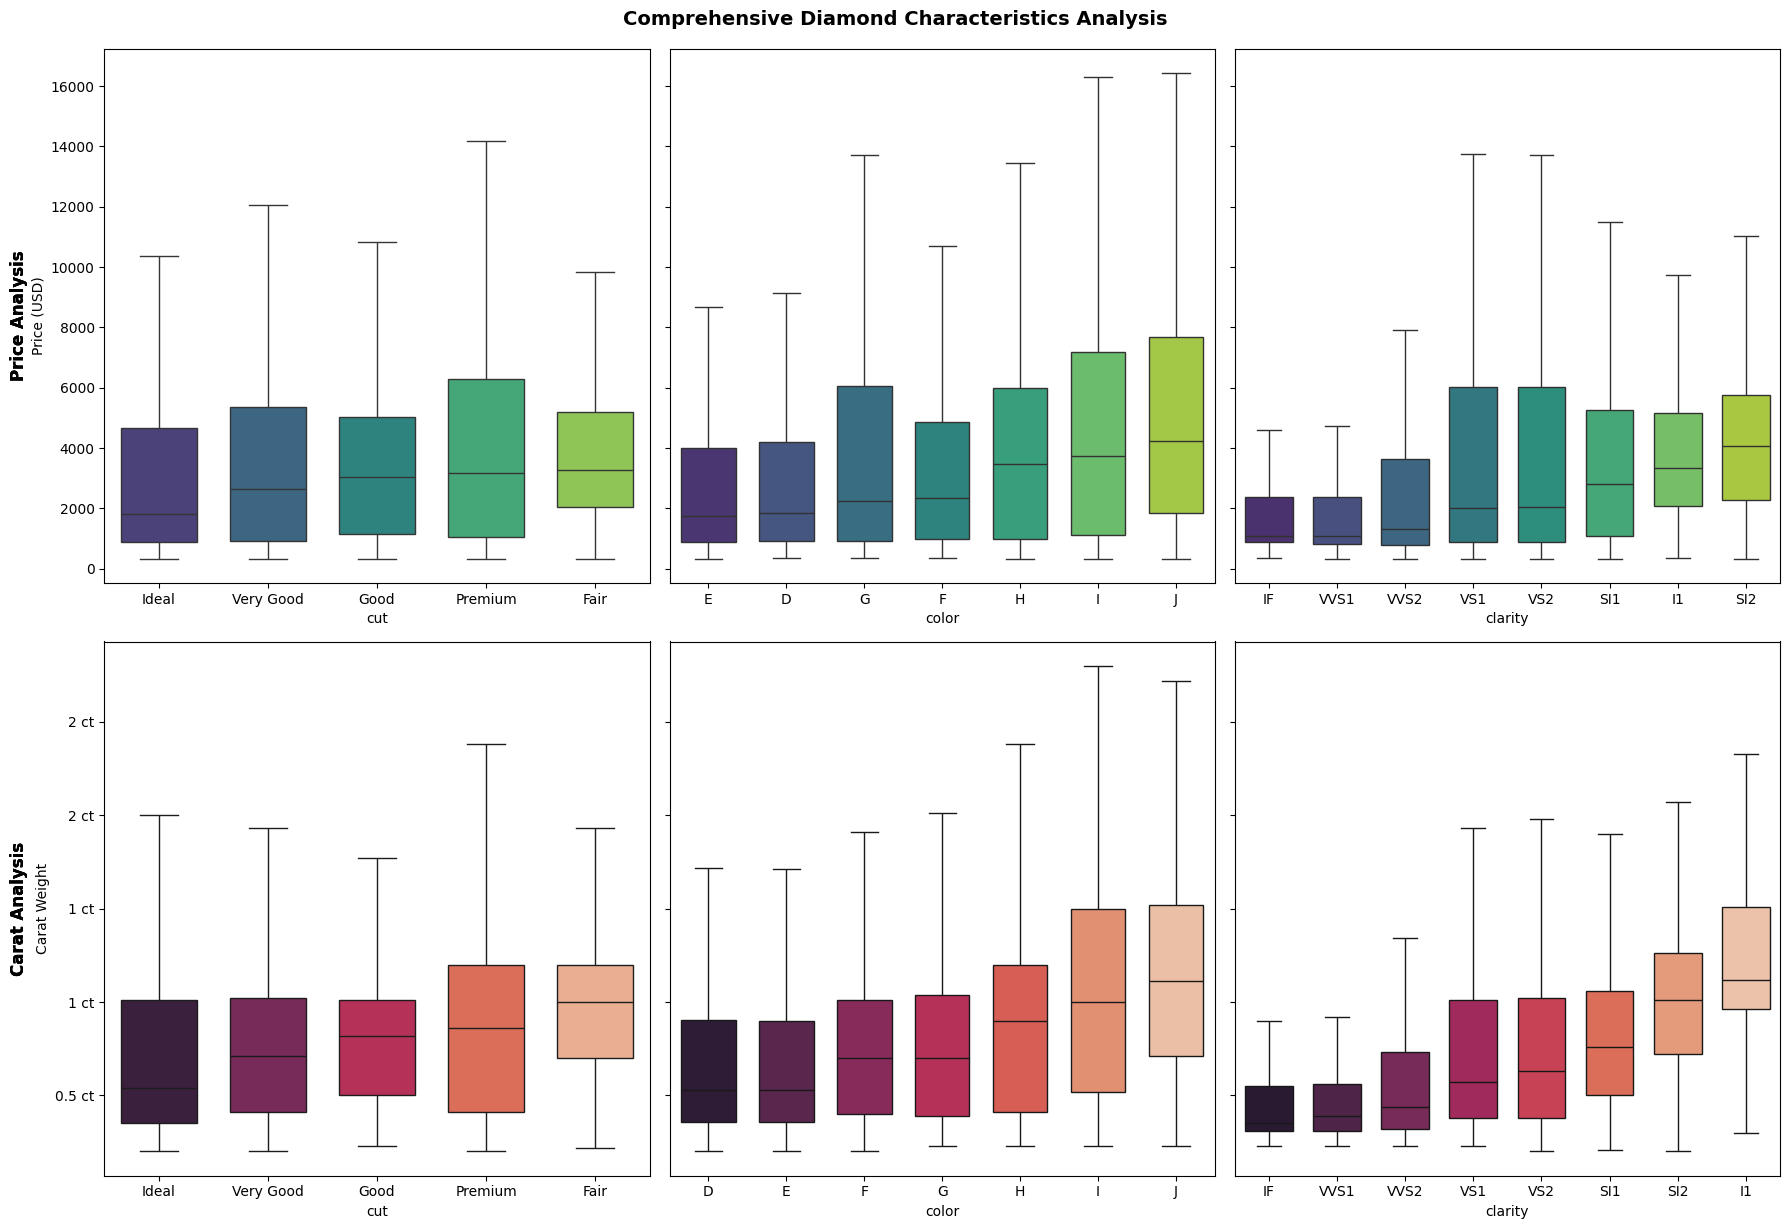

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), sharey='row')

# Configuration for each analysis type
config = {
    'price': {
        'title': 'Price Analysis',
        'ylabel': 'Price (USD)',
        'palette': 'viridis',
        'unit': ''
    },
    'carat': {
        'title': 'Carat Analysis',
        'ylabel': 'Carat Weight',
        'palette': 'rocket',
        'unit': ' ct'
    }
}

def median_order(x, y):
  """Calculate median orders for consistent sorting across categories."""

  return diamonds_df.groupby(x)[y].median().sort_values(ascending=True).index

for i, var_y in enumerate(['price', 'carat']):
  for j, var_x in enumerate(['cut', 'color', 'clarity']):
    sns.boxplot(x=diamonds_df[var_x],
                y=diamonds_df[var_y],
                order=median_order(var_x, var_y),
                ax=ax[i,j],
                showfliers=False,
                palette=config[var_y]['palette'],
                width=0.7)

#The annotate fuynction allow to wrote a text anywhre in the plot area by given
#axes fraction and offeset
    ax[i][0].annotate(
            config[var_y]['title'],
            xy=(0, 0.5),
            xytext=(-55, 0),
            xycoords='axes fraction',
            textcoords='offset points',
            ha='right',
            va='center',
            fontsize=12,
            fontweight='bold',
            rotation=90
        )

#Add trailing ct into x tick labels
    if config[var_y]['unit']:
        yticks = ax[i][0].get_yticks()
        ax[i][0].set_yticklabels([f"{int(y)}{config[var_y]['unit']}"
                          if y >= 1 else f"{y:.1f}{config[var_y]['unit']}"
                          for y in yticks])

    ax[i][0].set_ylabel(config[var_y]['ylabel'])
    plt.tight_layout()

fig.suptitle(
        "Comprehensive Diamond Characteristics Analysis",
        y=1.02,
        fontsize=14,
        fontweight='bold'
    )

plt.show()

#### Furhter exploratory carat and price analysis

As seen before, the carat strongly affects the price range. Bigger the diamond, the higher the price. The other 3Cs categories add an extra layer by making the same carat weight more expensive due to its characteristics.

In this section, the carat size will be further explored to identify patterns and more intrinsic correlations with the other categoric variables present in the dataset.

From the carat histogram below, it is identified a tall spike at “round number” or “magic” carat weights (0.25 ct, 0.50 ct, 0.75 ct, 1.00 ct, 1.50 ct …) and far fewer stones at awkward values like 0.47 ct or 0.99 ct. This may be related to market demand.

This behavior shows also an odd little “step” around every magic size break point. For example:
- the bin just to the left of the break point is almost empty (e.g. 0.29 ct, 0.49 ct, 0.99 ct);
- the exact bin and the one just to the right are crowded (e.g. 0.31 ct, 0.51 ct, 1.01 ct).

The scatterplot makes this visible in the sense that a kind of "walls" are observed at each magic breakpoint.
The conclusion is that carat is not a smooth measure and in consequence models that reflect a symmetric distribution will not precisely estimate prices around the cut-offs.
In all likelihood, this reflects market demand regarding specific measurements and qualities. Therefore, market values round numbers rather than diamond sizes a bit over the break point.


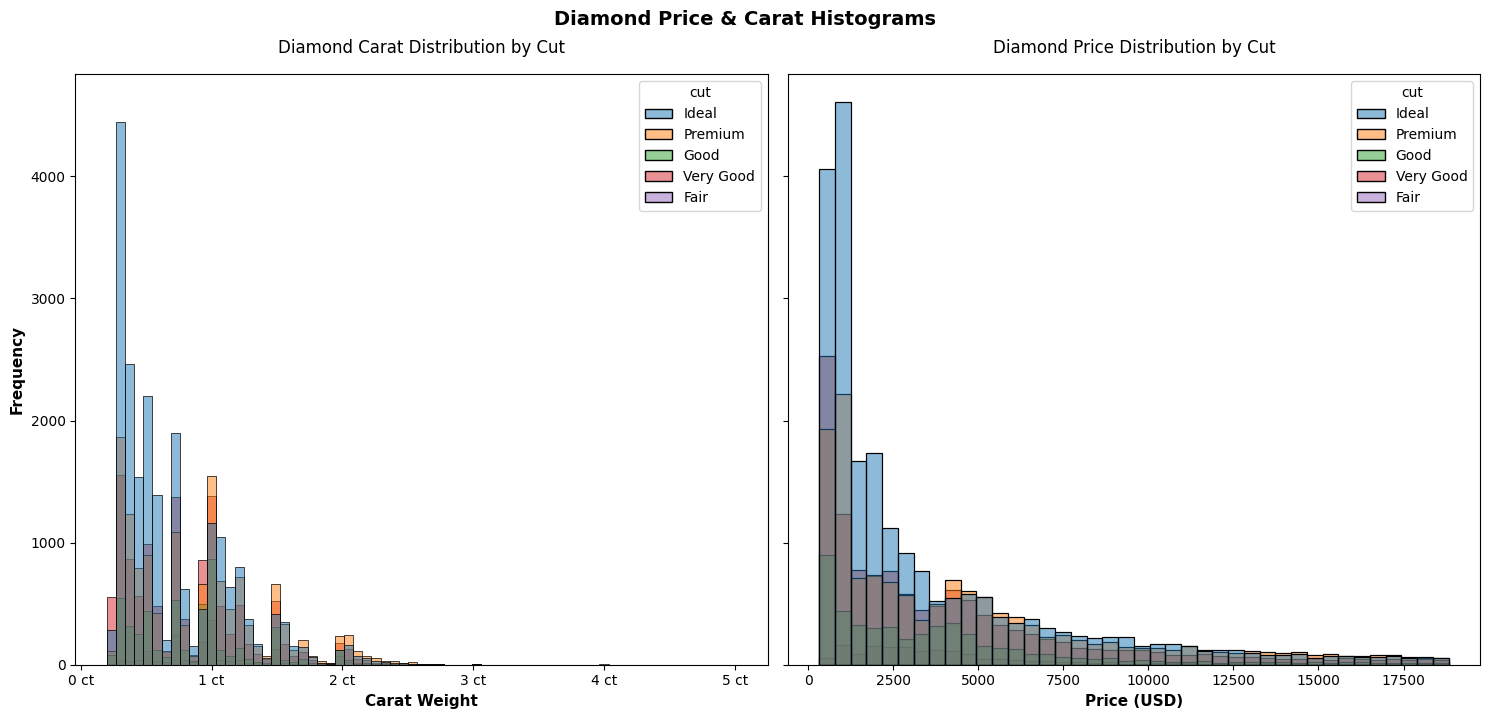

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey='row', constrained_layout=True)

plt.xticks(np.arange(0, 5, 0.25))
sns.histplot(data=diamonds_df, x='carat', hue='cut', binwidth=0.07, ax=ax[0])

#Add trailing ct into x tick labels
xticks = ax[0].get_xticks()
ax[0].set_xticklabels([f"{int(y)} ct" for y in xticks])

ax[0].set_title('Diamond Carat Distribution by Cut', pad=15, fontsize=12)
ax[0].set_xlabel('Carat Weight', fontsize=11, fontweight='bold')
ax[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')

plt.xticks(np.arange(0, 18000, 2500))
sns.histplot(data=diamonds_df, x='price', hue='cut', bins=40, ax=ax[1])

ax[1].set_title('Diamond Price Distribution by Cut', pad=15, fontsize=12)
ax[1].set_xlabel('Price (USD)', fontsize=11, fontweight='bold')

plt.tight_layout()

fig.suptitle(
        "Diamond Price & Carat Histograms",
        y=1.02,
        fontsize=14,
        fontweight='bold')
plt.show()


The ```lmplot``` (linear model plot) visualization allows to visualize relationships between variables across a combination of scatter plots and regression model.

The three charts below indicate the regression lines included for each of the categorical variables.

The first chart shows the steeper line referring to the Ideal cut, while the Fair cut is more spread (the band around the line demonstrates that) and shows that the price doesn't grow that fast as the other lines. Likewise, the cuts don’t offer a very distinguished price differentiation when they are compared to each other.

The same is observed for diamond colors. They show grouped together depending on how colorless the diamond is, not offering much discrepancy between them.

The Clarity feature regression lines are easier to recognize. It is clearer to observe the midpoint VS2 attribute almost in the middle among all regression lines, offering the best "cost-carat" benefit.


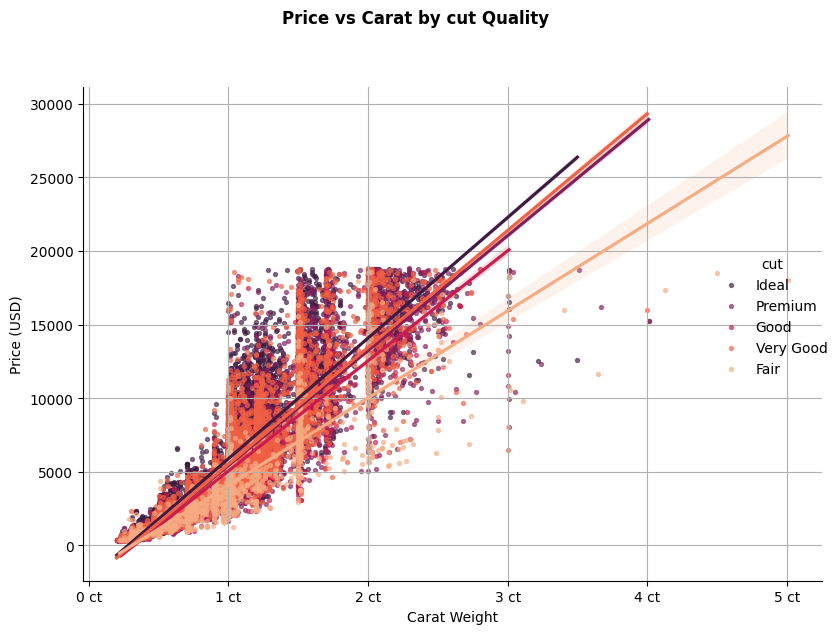

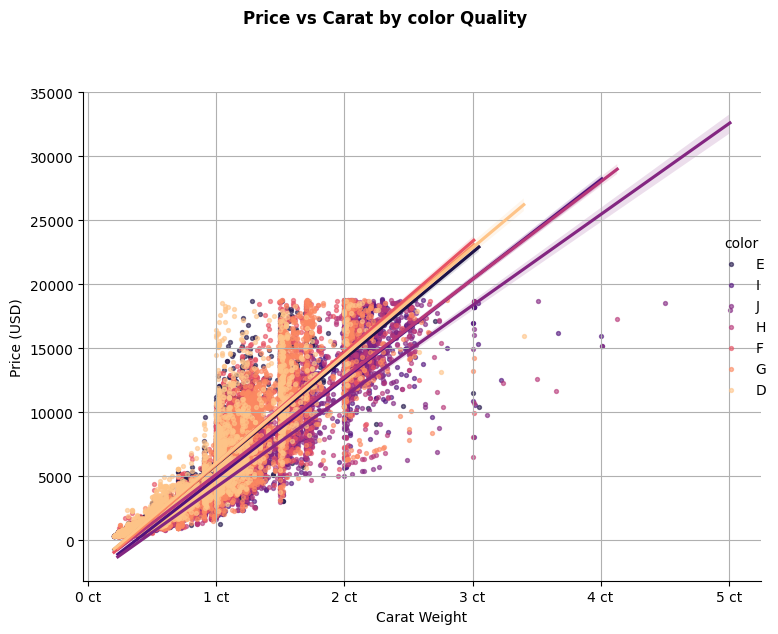

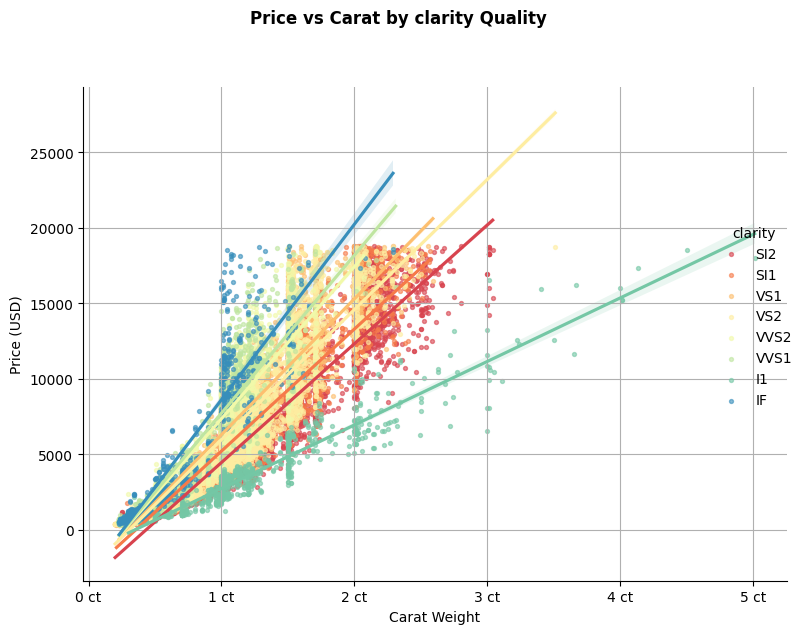

In [98]:
def plot_price_carat_qual_relationship(hue_var, pallete):
  """
  Plot price vs carat relationship with regression line for a given hue variable.
  lmplot was used under its own FacetGrid (providing a bit of disproportion between
  each of the charts) by purpose to highlight the differences between each of the
  correlation lines.

  Parameters:
    hue_var: Variable to use for coloring points ('cut', 'color', 'clarity')
    pallete: Color palette to use
  """
  g = sns.lmplot(x='carat', y='price', hue=hue_var,
                data=diamonds_df, palette=pallete,
                height=6, aspect=1.2, scatter_kws={'s': 8, 'alpha': 0.6})

  g.set_axis_labels('Carat Weight', 'Price (USD)')
  g.fig.suptitle(f'Price vs Carat by {hue_var} Quality',
                 y=1.05,
                 fontweight='bold')

  for ax in g.axes.flat:
      ax.grid(True) # Add grid lines to each subplot
      xticks = ax.get_xticks() #Add trailing ct into x tick labels
      ax.set_xticklabels([f"{int(y)} ct" for y in xticks])

  plt.tight_layout()
  plt.show()

plot_price_carat_qual_relationship('cut', 'rocket')
plot_price_carat_qual_relationship('color', 'magma')
plot_price_carat_qual_relationship('clarity', 'Spectral')



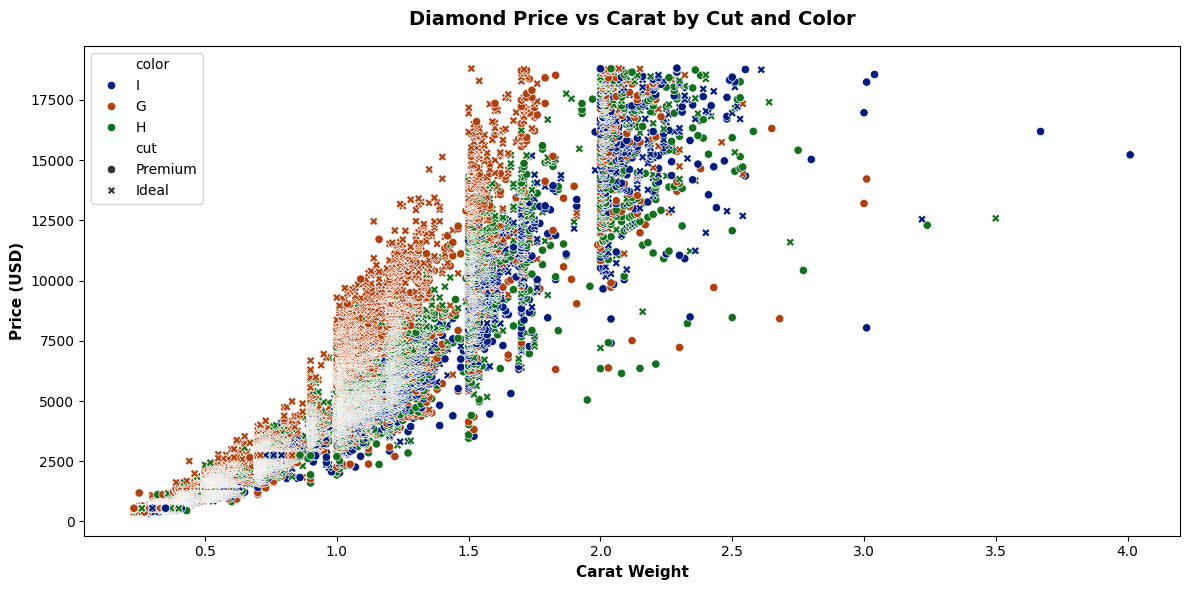

In [36]:
#another way to visualize the same observations and correlations above, however,
#narrowing to the most interesting qualirty variables and to highlight the walls
# and different price points to the same carat

plt.figure(figsize=(12, 6))
filtered_df = diamonds_df[(diamonds_df['color'].isin(['G', 'H', 'I'])) &
 (diamonds_df['cut'].isin(["Ideal", "Premium"]))]
sns.scatterplot(data=filtered_df,
                x='carat',
                y='price',
                style='cut',
                hue='color',
                palette='dark')
plt.title('Diamond Price vs Carat by Cut and Color',
          pad=15,
          fontsize=14,
          fontweight='bold')
plt.xlabel('Carat Weight', fontsize=11, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()


#### Depth and Table comprehensive analysis

```Depth``` and ```Table``` are the 2 variables in the diamonds dataset that still haven't been mentioned in the analysis so far (along with the ```x```, ```y```,```z``` ).

The reason they don't receive much focus is explained by these main practical reasons:
1. Low correlation with price as seen from the correlation heatmap below
2. They have a huge impact on the 4Cs. Diamonds under ideal depth and table measurements, directly reflets better cut, clarity and color.
2. The are very little spread and histograms look like narrow spikes. Visually they just don’t reveal much signal or structure.
3. Looking at measurements, quality categorical values and these two variables, they also look like quality categorical assignments but with weaker correlation with price compared to the above study tries to demonstrate - cut/color/clarity.
4. Analyses and storytelling are more focused on 4Cs narrative (carat, cut, color, clarity) making correlations more straightforward to explain. Most likely, the market also favors the 4Cs rather than table and depth variables. Consequetly, diamonds with higher-end prices due to superior quality stands for ideal depth and table measurements as well.


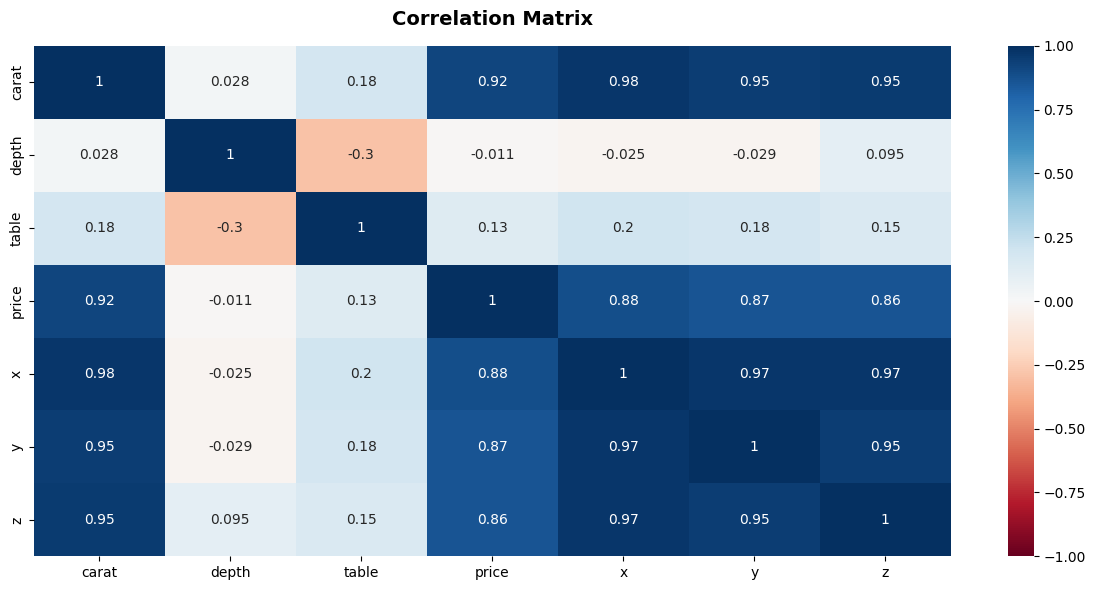

In [35]:
# The complete correlation matrix demonstrating the full reltation of variables
# with price
plt.figure(figsize=(12, 6))
non_categorical_df = diamonds_df.select_dtypes(exclude='object')
df_corr = non_categorical_df.corr()
sns.heatmap(df_corr, annot=True, cmap='RdBu', vmin=-1, vmax='1')
plt.title('Correlation Matrix',
          pad=15,
          fontsize=14,
          fontweight='bold')

plt.tight_layout()
plt.show()

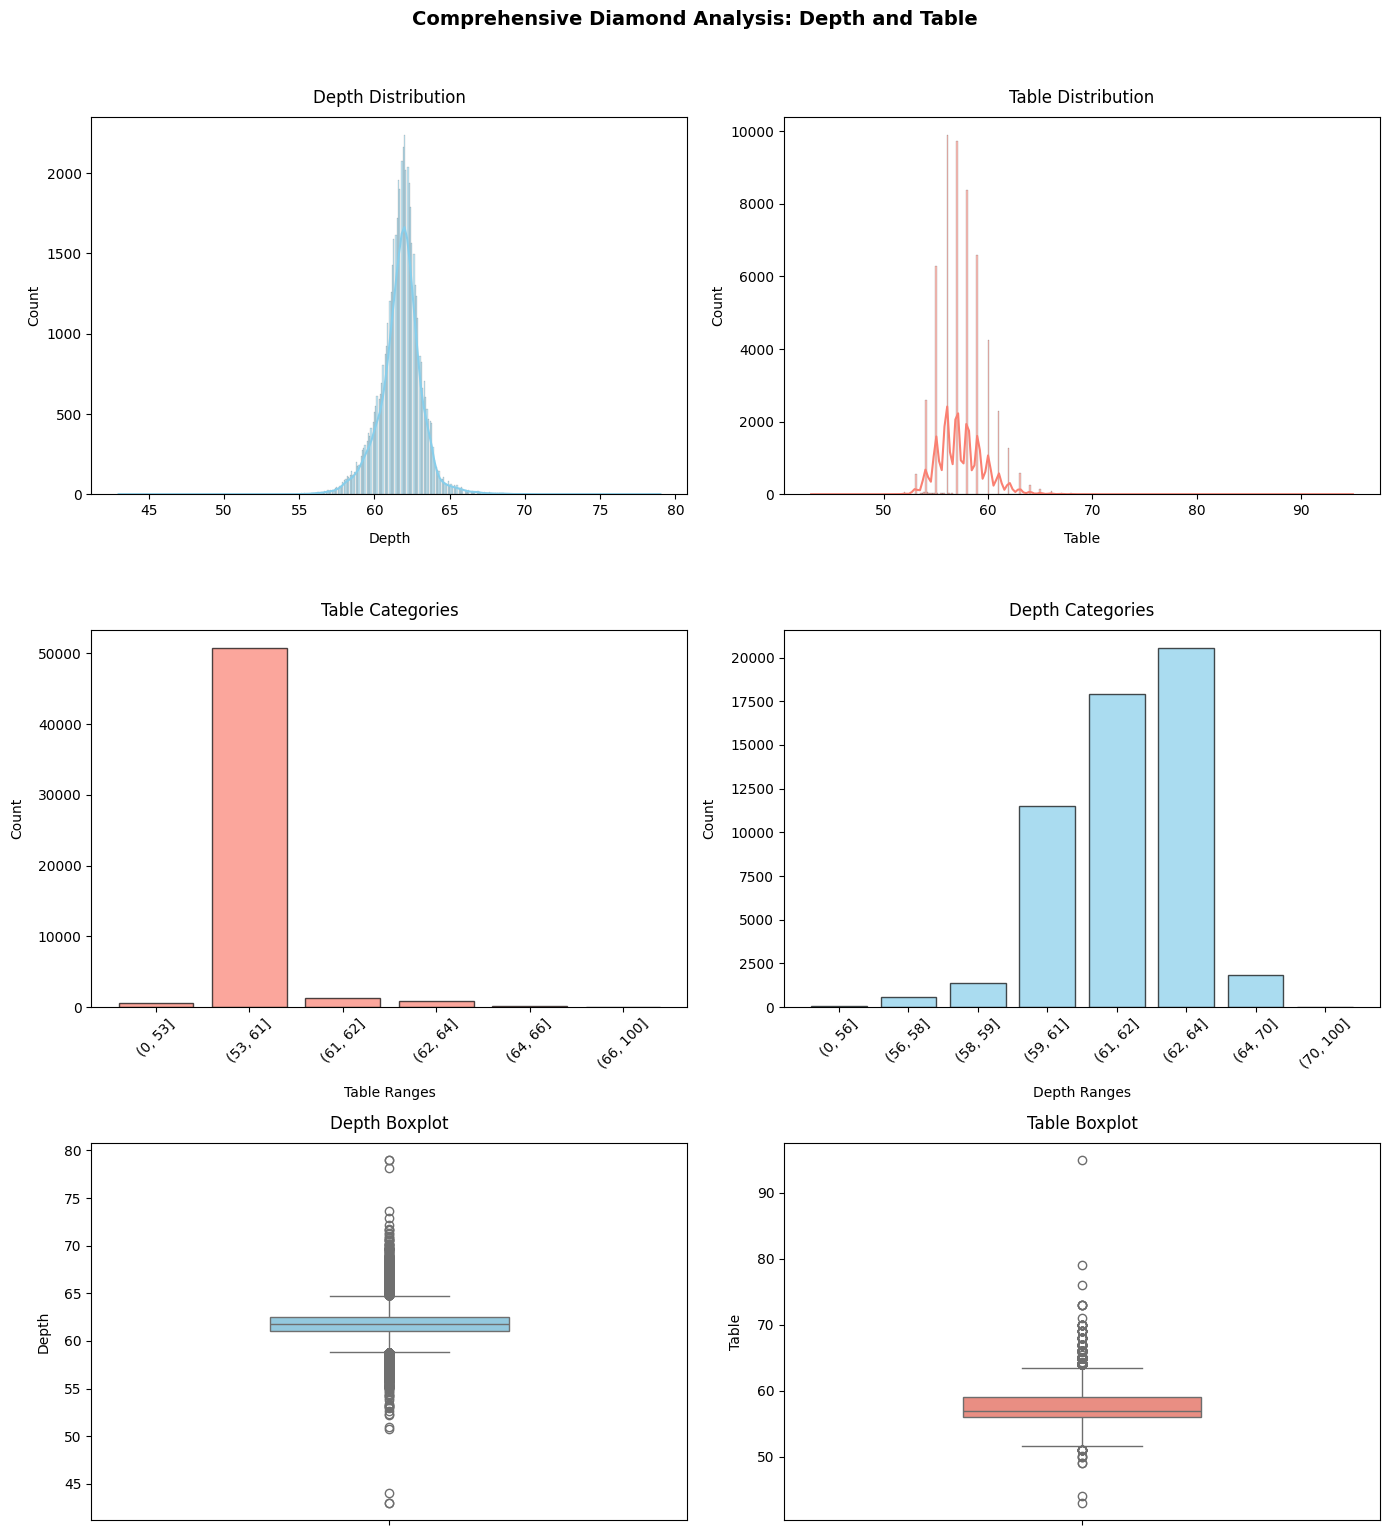

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(14, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing between subplots


# --- Row 1: Histograms ---
# First row - Histplots
sns.histplot(diamonds_df['depth'], kde=True, ax=ax[0, 0], color='skyblue')
ax[0,0].set_title('Depth Distribution', pad=10)
ax[0,0].set_xlabel('Depth', labelpad=10)

sns.histplot(diamonds_df['table'], kde=True, ax=ax[0, 1], color='salmon')
ax[0,1].set_title('Table Distribution', pad=10)
ax[0,1].set_xlabel('Table', labelpad=10)

# --- Row 2: Binned Bar Plots ---
# Second row - Bar plots
categories = pd.cut(diamonds_df['table'], [0, 53, 61, 62, 64, 66, 100])
bin_counts = categories.value_counts(sort=False)
ax[1,0].bar(bin_counts.index.astype(str),
             bin_counts.values,
             edgecolor='black',
             color='salmon',
             alpha=0.7)

ax[1,0].set_title('Table Categories', pad=10)
ax[1,0].set_xlabel('Table Ranges', labelpad=10)
ax[1,0].set_ylabel('Count', labelpad=10)
ax[1,0].tick_params(axis='x', rotation=45)

categories = pd.cut(diamonds_df['depth'], [0, 56, 58, 59, 61, 62, 64, 70, 100])
bin_counts = categories.value_counts(sort=False)
ax[1,1].bar(bin_counts.index.astype(str),
            bin_counts.values,
             edgecolor='black',
            color='skyblue',
            alpha=0.7)

ax[1,1].set_title('Depth Categories', pad=10)
ax[1,1].set_xlabel('Depth Ranges', labelpad=10)
ax[1,1].set_ylabel('Count', labelpad=10)
ax[1,1].tick_params(axis='x', rotation=45)

# --- Row 3: Boxplots ---
# Depth boxplot
sns.boxplot(y=diamonds_df['depth'], ax=ax[2, 0], color='skyblue', width=0.4)
ax[2, 0].set_title('Depth Boxplot', pad=10)
ax[2, 0].set_ylabel('Depth', labelpad=10)

# Table boxplot
sns.boxplot(y=diamonds_df['table'], ax=ax[2, 1], color='salmon', width=0.4)
ax[2, 1].set_title('Table Boxplot', pad=10)
ax[2, 1].set_ylabel('Table', labelpad=10)

# Subplot title
fig.suptitle('Comprehensive Diamond Analysis: Depth and Table',
             y=1.02,
             fontsize=14,
             fontweight='bold')

plt.tight_layout()
plt.show()

#### Conclusion

As initially noted, price offers a high variance distribution carried out by a long tail. The great majority of observations are concentrated between a few hundred dollars to around $ 2500. This directly correlates with smaller carets which are observed as an standard of the market.
The variation of prices (some of them grow tremendously by the same carat) is given by the 3Cs characteristics that mold the diamonds aesthetics.

The market demand is also recognized in terms of carats weights being grouped in steps (or blocks) of “round number”.

Market research about the topic, indicates 2 main segmentations divided by diamnond applications (Jewelry and Industrial). Retail Jewelry is broken downn into three main seub-segments:

| Segment    | Carat | Cut | Color | Clarity | Amount | Agv. Price |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **Bridal budget** | 0.3-0.6 ct | Very Good | G–H | SI1–SI2 | 407 | \$804.48 |
| **Investment/collector** | ≥ 1 ct | Ideal  | D-G | VVS2-IF | 665 | \$11201.52 |
| **Value maximiser** | 0.8-1.1 ct | Good    | J-I | SI2-I | 42 | \$3155.57 |

Industrial diamonds comprinse in less finished dimandond in a high variation of carats depending on its application. The rest of the dataset belongs to this segmentation.

This comprehensive analysis provides a clear comparison of pricing change across different diamond market segments, highlighting the trade-offs between quality, size, and price.

On the next section, during the data preprocessing, it can be applied a feature engineering that clusters the diamonds into their market segment as displayed above. This is helpful to identify whether the target price regression analysis is under expected price range in the underlying segment or not.


Segment: Bridal budget
Filtered diamonds count: 407
Price range: $388.00 - $1698.00
Average price: $804.48

Segment: Investment/collector
Filtered diamonds count: 665
Price range: $5914.00 - $18806.00
Average price: $11201.52

Segment: Value maximiser
Filtered diamonds count: 42
Price range: $1945.00 - $3856.00
Average price: $3155.57



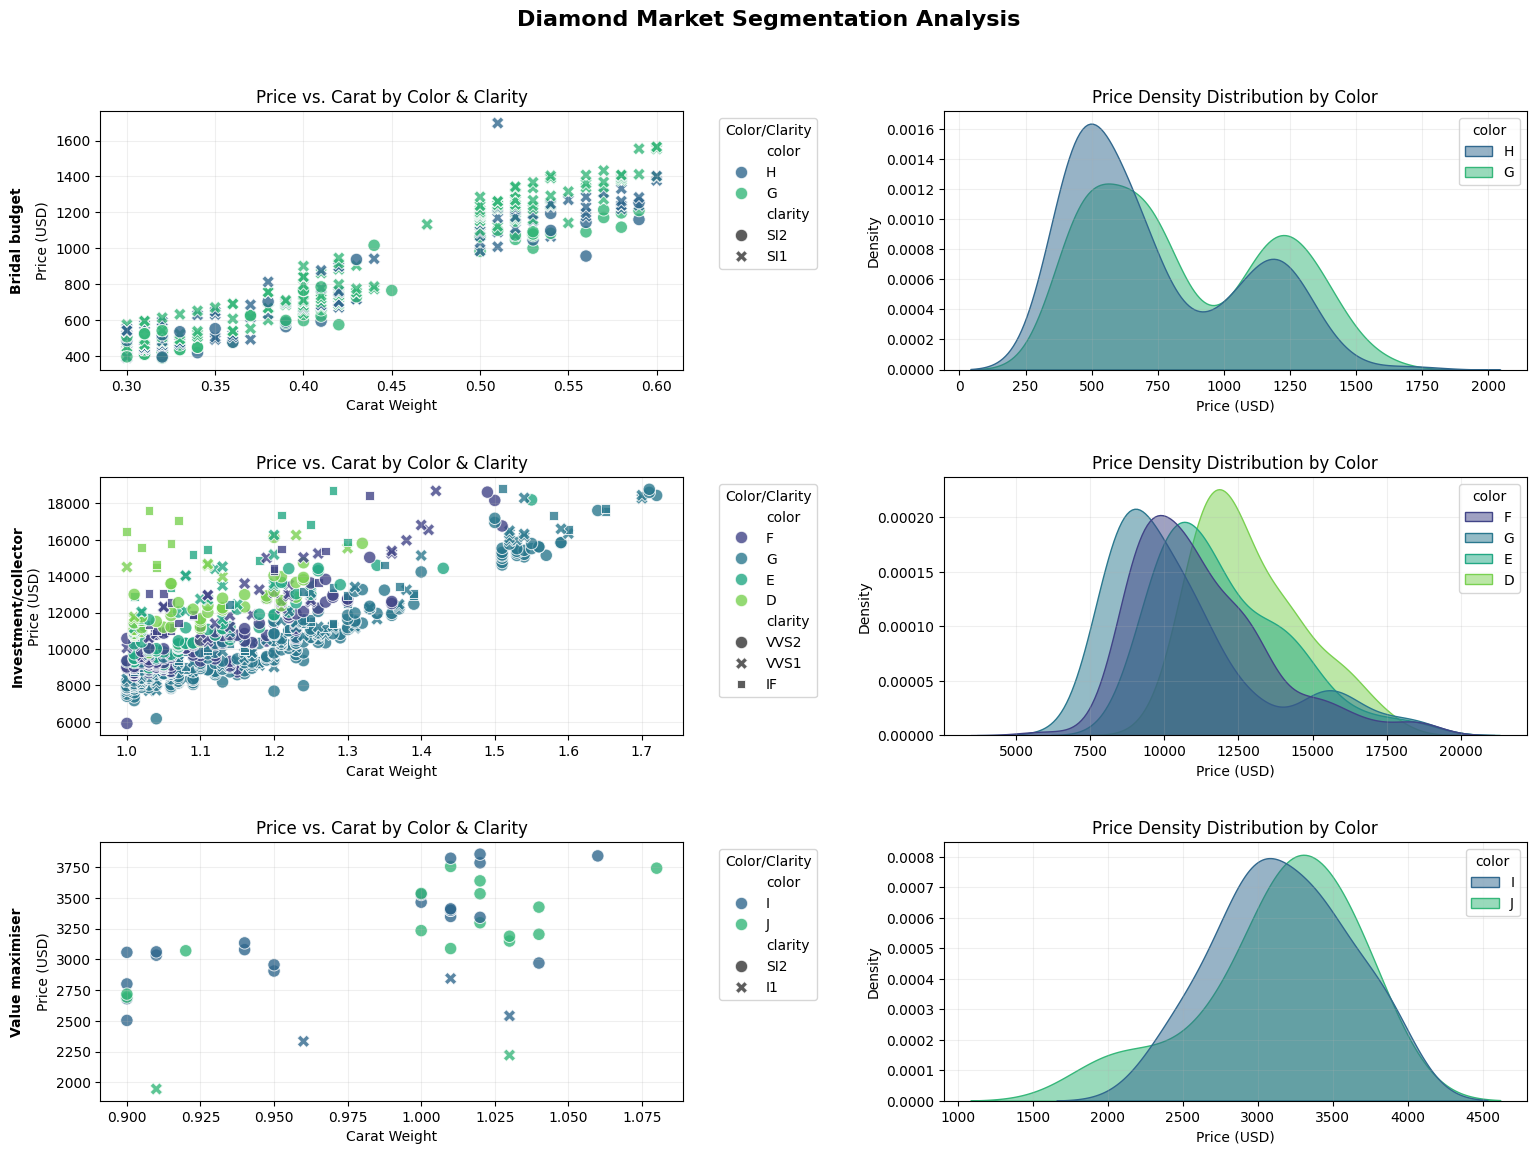

In [93]:
# Define segments with specific criteria
segments = {
    "Bridal budget": {
        "carat": (0.3, 0.6),
        "color": ['G', 'H'],
        "clarity": ['SI1', 'SI2'],
        "cut": ['Very Good']
    },
    "Investment/collector": {
        "carat": (1.0, diamonds_df['carat'].max()),
        "color": ['D', 'E', 'F', 'G'],
        "clarity": ['VVS2', 'VVS1', 'IF'],
        "cut": ['Ideal']
    },
    "Value maximiser": {
        "carat": (0.8, 1.1),
        "color": ['I', 'J'],
        "clarity": ['SI2', 'I1'],
        "cut": ['Good']
    }
}

def segmented_dataset(segment_name):
  return diamonds_df[
        (diamonds_df['carat'].between(segments[segment_name]["carat"][0],
                                      segments[segment_name]["carat"][1])) &
        (diamonds_df['color'].isin(segments[segment_name]["color"])) &
        (diamonds_df['clarity'].isin(segments[segment_name]["clarity"])) &
        (diamonds_df['cut'].isin(segments[segment_name]["cut"]))
    ]


fig, ax = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Diamond Market Segmentation Analysis',
             fontsize=16, fontweight='bold', y=0.98)

for i, segment_name in enumerate(segments.keys()):
  filtered_diamonds = segmented_dataset(segment_name)

  # Plot 1: Carat vs Price with Color and Clarity
  scatter = sns.scatterplot(
      data=filtered_diamonds,
      x='carat',
      y='price',
      hue='color',
      style='clarity',
      palette='viridis',
      s=80,
      alpha=0.8,
      ax=ax[i, 0]
  )
  ax[i,0].set_title('Price vs. Carat by Color & Clarity')
  ax[i,0].set_xlabel('Carat Weight')
  ax[i,0].set_ylabel('Price (USD)')
  ax[i,0].grid(alpha=0.2)
  ax[i,0].legend(title='Color/Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Plot 4: Price Density Distribution
  density = sns.kdeplot(
      data=filtered_diamonds,
      x='price',
      hue='color',
      fill=True,
      palette='viridis',
      alpha=0.5,
      common_norm=False,
      ax=ax[i,1]
  )
  ax[i, 1].set_title('Price Density Distribution by Color')
  ax[i, 1].set_xlabel('Price (USD)')
  ax[i, 1].set_ylabel('Density')
  ax[i, 1].grid(alpha=0.2)

  ax[i][0].annotate(
        segment_name,
        xy=(0, 0.5),
        xytext=(-55, 0),
        xycoords='axes fraction',
        textcoords='offset points',
        ha='right',
        va='center',
        fontsize=10,
        fontweight='bold',
        rotation=90
    )

  # Show filtered sample statistics
  print(f"Segment: {segment_name}")
  print(f"Filtered diamonds count: {len(filtered_diamonds)}")
  print(f"Price range: ${filtered_diamonds['price'].min():.2f} - ${filtered_diamonds['price'].max():.2f}")
  print(f"Average price: ${filtered_diamonds['price'].mean():.2f}")
  print()

plt.tight_layout(pad=3.0)
plt.show()



### Data Prepocessing

This step aims to prepare the data to enhance the quality of the dataset, streamlining the modelling process by leading to more reliable and accurate predictive diamond price models.

Data Preprocessing techniques encompass data preparation and/or data wangling by identifying and rectifying wrong or misleading information. This step is important because the whole process achieves more precise and reliable results for the execution of Machine Learning algorithms as well as enhanced model performance.

The processing of the diamond’s dataset is comprised on the following steps:

1. Data Cleaning and outliers’ evaluation
2. Dataset separation and Splitting
3. Standardization
4. Category Transformation


#### Data Cleaning

1. Missing and redundant columns

  During Data Exploitation, it was discovered that 20 records in the ```X``` ```Y``` ```Z``` columns have 0 measurements, which invalidates inconsistency in the data. Although the amount is irrelevant compared to the total amount of lines on the entire dataset, these records could have been dropped. However, it was also identified that these columns have very high correlation with ```carat```, and once carat has a much more important relationship with diamond business model and consequently to their prices, the ```X``` ```Y``` ```Z``` columns can be entirely removed from the dataset. It helps simplifying the dataset complexity.

  Conversely, the same occurs with columns ```table``` and ```depth```, which have a very low correlation with diamond prices whose values are highly concentrated in a narrow band of values. However, in a initial verification, this measurement will be kept in the dataset, due to its relationship with the quality metrics in the 4Cs measurement.

2. Outliers

On EDA phase, it was identified the amount of outliers in each of the main variables were:

| Variable    | Amount of Outliers | Percentage |
| ----------- | ----------- | ----------- |
| ```carat``` | 1889        | ~3.5%       |
| ```price``` | 3540        | ~6.6%       |
| ```table``` | 589         | ~1.1%       |
| ```depth``` | 1039        | ~1.9%       |

There are several techniques to handle outliers. But generally, it depends on the business goal. For each of the variables, it may have a different approach:

| Variable    | Reason for Outliers |
| ----------- | ----------- |
| ```carat``` |  Very large diamonds (e.g., > 3 ct) are rare but valid.  |
| ```price``` | Generally, high carat with premium cuts and colors are rare stones high-end for luxury industry. There are no errors in the price, although they are highly skewed       |
| ```table``` and ```depth``` | Outliers exist and may be due to cutting errors or data entry issues (e.g., values < 55% or > 75%).         |

In general, it is good practice to maintain full diversity of variables for general-purpose modeling. The conclusion is to maintain ```carat``` and ```price``` rows and to remove ```table``` and ```depth``` records in wich there are observed outliers. See the table below:

| Variable    | Outlier Approach |
| ----------- | ----------- |
| ```carat``` | keep  |
| ```price``` | Log-Transform        |
| ```table``` | remove         |
| ```depth``` | remove        |

Obs.: The log-transform makes more sense to be applied to ```price``` column since it presents a Right-skewed, wide range of distortions than any other variable in the dataset.

On the other side, it was decided not to apply log-transform on the ```carat``` variable since the skewed is not as heavier than the ```price``` is, and only applying the standardization transformation will perform the necessary feature scaling for model improvement.

##### Execution

After initially analyzing data wangling and outliers, lets start the execution of the preprocessing steps:

**Step 1.** The initial step is the separation of features (X) and target (y). It defines what will be predicted (y) and what will be used to predict it (X). This good practice keeps the logic clean and avoids leaking (y) into the features.

**Step 2.** Apply Log-Transform on (y) target feature. This step can be done before separating the dataset into feature and target but respecting first the separation ensures good practice by making the code cleaner and avoids mistakes. It is important to note that the Log-Transformation must be performed before the splitting in Train-Test once it is being applied on the target variable by reducing its variability, so the same transformation needs to be carried out on whole ```price``` feature.

**Step 3.** Split the dataset into Train and Test. Everything else that is applied into the preprocessing phase must be done after the splitting. Breaking the dataset into train and test means that the training set will be used to evaluate and tweak the machine learning model, while the testing set is used to evaluate how well the trained model generalizes to new, unseen data.

**Step 4.** Use IQR to clean outliers in ```table``` and ```depth``` variables.
If IQR is executed on the entire dataset and then use it to filter outliers before the split, there is an introduction of data leakage. Thus, the IQR used to clean the data was also influenced by the test set, so the model was wrongly optimized.


In [20]:
#drop unnened columns (from the assumpion described above)
clean_df = diamonds_df.drop(['x', 'y', 'z'], axis=1)
clean_df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


<Axes: ylabel='Count'>

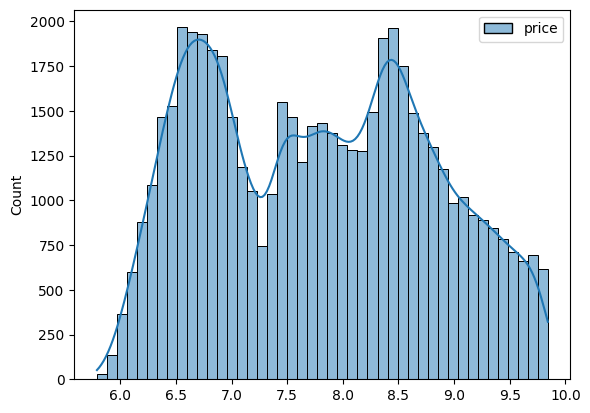

In [21]:
# Step 1: Separate features and target
X = clean_df.drop(columns='price')
y = clean_df['price']

# Step 2: Apply transformation to y
y_log = np.log1p(y)
y_log = y_log.to_frame()

sns.histplot(y_log, kde=True)

In [22]:
# Step 3: Train/test split
# test_size: represents the proportion of the dataset to be allocated to the test set
# random_state: get the same split of data every time the code is executed
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log,
                                                            test_size=0.2,
                                                            random_state=42)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train_log.shape}")
print(f"Dimensões de y_test: {y_test_log.shape}")

Dimensões de X_train: (43154, 6)
Dimensões de X_test: (10789, 6)
Dimensões de y_train: (43154, 1)
Dimensões de y_test: (10789, 1)


In [23]:
def iqr_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filtering on training set only
# merge sets (X) and (y) to apply filter
train = X_train.copy()
train['price'] = y_train_log
train = iqr_filter(train, 'table')
train = iqr_filter(train, 'depth')

# Separate back
y_train_log = train['price']
X_train = train.drop(columns='price')

In [24]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train_log.shape}")
print(f"Dimensões de y_test: {y_test_log.shape}")

Dimensões de X_train: (40476, 6)
Dimensões de X_test: (10789, 6)
Dimensões de y_train: (40476,)
Dimensões de y_test: (10789, 1)


#### Standadization

Standardization (or Z-score scaling) transforms the data to have mean 0 and standard deviation 1. This technique is part of feature scaling that is mainly used to standardize or normalize numeric variables. This step is important because ensures that features contribute equally to the model's learning process, preventing features with larger values from dominating the model.

The standardization for the diamond prices dataset is going to be applied on the ```price``` and ```carat``` variables. For ```price```, it is, now that the values are log-transformed, they can have a better behavior when standardized, meaning that outliers have been reduced throughout log transformation. So, the right-skewed, wide range variation has been reduced, and the standardization has a better effect over it.

It is not required to run both sequentially Standardization and Normalization on those variables. By doing this, normalizing after standardizing, the standardized values will be squashed into [0, 1], which ends up defeating the purpose of Z-scores standardization.

Steps:

1. Apply ```StandardScaler``` to ```price``` and ```carat``` variables
2. Use  ```fit_transform``` on training set and ```transform``` on test set.

**Note:** ```transform``` is used on test set, because it only applies the transformation without recalculating any parameters. This ensures that the validation dataset remains entirely independent from the training process.


#### Category Variables Transformation

Categorical Transformation is a technique in Machine Learning that represents categorical data as numerical vectors, where each unique category is represented by a binary column with a value of 1 indicating its presence and 0 indicating its absence.

There two techniques possible to be applied in category transformation:

 - OneHot Encoding
 - Dummy Encoding

Dummy encoding seems more suitable to the diamond prices since it deals with regression and can easily drop one level of to avoid multicollinearity.

This is going to be the one selected for categorical columns transformation.

##### Execution

When dealing with datasets that contain different types of features, such as numerical and categorical data, it is required to use ```ColumnTransformer``` allowing to apply different transformations to different subsets of features within the working dataset.

In the snippet below, the continuous variables (numbers) and separated from the categorical ones as well as the target dataset.


In [25]:
X_num_cols = ['carat', 'table', 'depth']
X_cat_cols = ['cut', 'color', 'clarity']
y_num_col = ['price']

# The ColumnTransformer creates a data preprocessing pipeline that applies
# different transformations to different columns
preprocessor_X = ColumnTransformer(
    # List of transformations to be applied to specific column groups
    transformers=[
        # 1st Transformer: Numerical columns
        ('t_num',
         StandardScaler(), # Applies standardization (mean=0, std=1)
         X_num_cols),

        # 2nd Transformer: Categorical columns
        ('t_cat',
         # Converts categories to one-hot encoded columns and
         #drops first category to avoid multicollinearity
         OneHotEncoder(drop='first', sparse_output=False),
         X_cat_cols)
    ],
    # Handling of columns not explicitly transformed
    remainder='passthrough' # Keep other columns (if any) - though not applicable here
)

preprocessor_y = ColumnTransformer(
    transformers=[
        ('t_y', StandardScaler(), y_num_col)
    ]
)

# Apply transformations using fit_transform on training data and transform on
# testing one
X_train_processed = preprocessor_X.fit_transform(X_train)
X_test_processed = preprocessor_X.transform(X_test)

y_train_log_df = y_train_log.to_frame()

y_train_processed = preprocessor_y.fit_transform(y_train_log_df)
y_test_processed = preprocessor_y.transform(y_test_log)

In [26]:
def validation(column, a):
  print(column,": ")
  print("%.2f" % a.mean())
  print("%.2f" % a.std())
  print()

validation('carat',X_train_processed[:, :1])
validation('table',X_train_processed[:, 1:2])
validation('depth',X_train_processed[:, 2:3])
validation('price',y_train_processed)

print("Lines and columns of X training set", X_train_processed.shape)
print("Lines and columns of y training set", y_train_processed.shape)

carat : 
0.00
1.00

table : 
-0.00
1.00

depth : 
0.00
1.00

price : 
0.00
1.00

Lines and columns of X training set (40476, 20)
Lines and columns of y training set (40476, 1)


### Conclusion

The diamond prices dataset stands for a clear regression problem of predictive analysis.

The dataset didn't present any missing data, and the prices column was very unbalanced and skewed distribution, however, none of them were regarded as outliers and neither, seamlessly, carat column.

Additionally, carat and price produced a strong correlation in which cut, color and clarity were adjectives of such correlation by contributing into superior prices for the same carat.

This behavior was more distinctly observed on smaller/lighter carats throughout a boxplot chart versus their respective prices. The boxplot also spotted out a higher concentration of diamonds on round carat values such as 0.25 ct, 0.50 ct, 0.75 ct, 1.00 ct, 1.50 ct, for example. Such behavior drew some kind of walls on these carats indicating significant price range on the same carat.

The **Exploratory Data Analysis** contributed to identify a strict relationship of the dataset with the retail diamond market. This association reveals that business needs conduct the behavior of price (small diamonds have more affordable prices in which the retail market has higher demand. Quality factors impact price as well, which builds up an special demand for more qualified high-end consumers.

Outliers, excluding errors and missings,

The **preprocessing** follows a well-structured procedure to prepare the data for the next Machine Learning phases. Some decision making was done in this phase:
1. Remove outliers from table and depth columns because the deviations are more clearly identified as outliers possibly produced from measurement errors.
2. Carat and price were decided there were only normal observations by following discrepancies as a result of diamond market needs rather than measurement errors.
3. Applied log transformation into prices column to reduce the high unbalanced variability
4. After dataset splitting (needed to avoid data leakage) Standardization and Category Transformation was applied.

The three-hypothesis raised at the beginning were able to be answered:

- Carat has high correlation with diamond prices.
  - Yes, the correlation is very high.

- Bigger the carat, the higher the price?
  - Not that exactly. It also depends on other factors such as cut, color and clarity. Thus, you can find small carats highly priced with high-end features than bigger ones with poor characteristics.
  - The dataset reflects the diamnod market segments price vary according to consumer demand and demand dictates size and quality of the diamonds.
- Is the diamond price dependent on categorical variables (cut, color, clarity)?
  - Yes. And those are also responsible for asymmetric high skew on price.  



